In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read the file and display columns.


In [2]:
# load the dataset
crew_df = pd.read_csv('../Dataset/ship_info.csv')

# check the dataset
print(crew_df.shape)
crew_df.head()

(158, 9)


,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


Above we observe that there are 158 rows and nine columns in the dataset. The columns are described as:

- `Ship_name`: unique ship name
- `Cruise_line`: The company that operates the cruise ship
- `Age`: The number of years the ship has been in operation
- `Tonnage`: The size or carrying capacity of the ships measured in tons.
- `passengers`: The number of passengers in the ship
- `length`: The length of the ships
- `cabins`: Number of cabins the ship has
- `passenger_density`: shows how densely occupied the ship is (higher density shows that there is high compactness of passengers in the ship)
- `crew`: show the number of people who work or operate on the ship.

We observe from the above also that some column values are continuous which are suppose to be discrete. For example, the `passengers`, `cabins` and `crew` columns are measured in continuous scale whereas, they should be in discrete values since there can't be `6.94` passengers, `3.55` cabins and `3.55` crew members on a ship. For this reason, we'll round the values in these columns to the nearest whole number.

In [3]:
# round the passengers, cabins and crew columns to the nearest whole number
# and convert them to a discrete integer
crew_df[['passengers', 'cabins', 'crew']] = crew_df[['passengers', 'cabins', 'crew']].round().astype('int64')

# check
crew_df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,7,5.94,4,42.64,4
1,Quest,Azamara,6,30.277,7,5.94,4,42.64,4
2,Celebration,Carnival,26,47.262,15,7.22,7,31.80,7
3,Conquest,Carnival,11,110.000,30,9.53,15,36.99,19
4,Destiny,Carnival,17,101.353,26,8.92,13,38.36,10


The dataframe looks better.

# Step 2: Calculate basic statistics of the data

In [4]:
crew_df.describe(include='all')

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158,158,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
unique,138,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Spirit,Royal_Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,15.689873,71.284671,18.525316,8.130633,8.841772,39.900949,7.829114
std,NaN,NaN,7.615691,37.229540,9.666871,1.793474,4.528075,8.639217,3.495571
min,NaN,NaN,4.000000,2.329000,1.000000,2.790000,0.000000,17.700000,1.000000
25%,NaN,NaN,10.000000,46.013000,12.250000,7.100000,6.000000,34.570000,5.250000
50%,NaN,NaN,14.000000,71.899000,20.000000,8.555000,10.000000,39.085000,8.000000
75%,NaN,NaN,20.000000,90.772500,24.750000,9.510000,11.000000,44.185000,10.000000


In [5]:
crew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    int64  
 5   length             158 non-null    float64
 6   cabins             158 non-null    int64  
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 11.2+ KB


From the above outputs, we observe the following:

- There are no null values across all columns in the dataset
- Two columns are non-numeric, while four are discrete numeric columns and 3 are continuous numeric columns
- There are 138 unique ships in the dataset. The total number of ships is 158, indicating that the dataset does not have exclusively unique ships.
- There are 20 cruise lines, indicating that there are 20 different companies that provide cruise ship services out of which `Royal_Carribbean` company owns 20 of such ships.
- The average age of ships in the dataset is 15 years and over 50% of ships have been in use for 14 years or more.
- The average tonnage of ships in the dataset is 71.3 tonnes, but the standard deviation shows that the tonnage capacity of ships in the dataset varies largely and this is also evident from the minimum tonnage of 2.3 tonnes and the maximum tonnage of 220 tonnes. This invariably means that the sizes of ships in the dataset varies greatly as som ships are over 100 times the size of others.
- Some ships in the dataset have a carrying capacity of just 1 passenger, and one crew member, while some have as much as 54 passengers and 21 crew members.
- On the average, ships in the dataset have about 9 cabins. Although a particular ship has none at all and 50% of the ships have 10 or more cabins.

# Step 3 (A): Select columns that will be probably important to predict crew size.

To accomplish this task, we'll need to drop the `ship_name` column because, it contains the unique ship names, with just a few ships occuring more than once in the dataset. 

Since the aim is to predict `crew` size, we can be sure that the `ship_name` plays no role in determining the size of crew for ships.

Another categorical column is the `Cruise_line` column which has 20 unique values within it. We'll use a boxplot to show the crew size for the various cruise lines

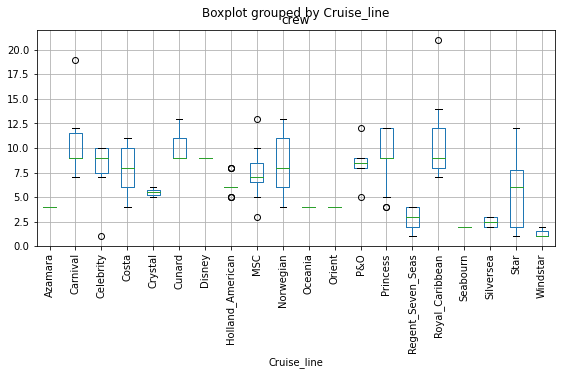

In [6]:
# create a boxplot showing the variation of crew size for each cruise line
crew_df.boxplot('crew', 'Cruise_line', rot = 90, figsize = (9, 4))

plt.show()

The above boxplot shows that some cruise lines have just one crew member, while some have over 15 crew members. There is no pattern from the boxplots as regards to `cruise_line` and `crew` size, therefore, we'll also drop the `cruise_line` column.

In [7]:
# drop the `Ship_name` and `Cruise_line` columns
crew_df.drop(['Ship_name', 'Cruise_line'], axis = 1, inplace = True)

#check
crew_df.head()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,6,30.277,7,5.94,4,42.64,4
1,6,30.277,7,5.94,4,42.64,4
2,26,47.262,15,7.22,7,31.80,7
3,11,110.000,30,9.53,15,36.99,19
4,17,101.353,26,8.92,13,38.36,10


Having dropped the categorical columns beacuse they show no relationships with the `crew` size, we'll perform a correlation between all other numeric columns and the crew column and also drop columns that correlates poorly to the crew size.

In [8]:
crew_df.corr()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
Age,1.000000,-0.606646,-0.513419,-0.532286,-0.509554,-0.278830,-0.533882
Tonnage,-0.606646,1.000000,0.942942,0.922368,0.947757,-0.040846,0.930195
passengers,-0.513419,0.942942,1.000000,0.880867,0.972189,-0.298646,0.920825
length,-0.532286,0.922368,0.880867,1.000000,0.891632,-0.090488,0.888100
cabins,-0.509554,0.947757,0.972189,0.891632,1.000000,-0.246129,0.951992
passenger_density,-0.278830,-0.040846,-0.298646,-0.090488,-0.246129,1.000000,-0.165135
crew,-0.533882,0.930195,0.920825,0.888100,0.951992,-0.165135,1.000000


Above, we find thatall variables correlates strongly with crew size except the `passenger_density` column which has a ver weak negative relationship crew size. We'll therefore drop this column and extract the other columns are plausible features.

In [9]:
# drop passenger density column
crew_df.drop('passenger_density', axis = 1, inplace = True)

# check the dataset
crew_df.head()

,Age,Tonnage,passengers,length,cabins,crew
0,6,30.277,7,5.94,4,4
1,6,30.277,7,5.94,4,4
2,26,47.262,15,7.22,7,7
3,11,110.000,30,9.53,15,19
4,17,101.353,26,8.92,13,10


# Step 3 (B): Create training and testing sets

Next, we'll create training and testing sets from the datset we have left. Our train set will consist of 60% of the entire dataset, while the test set will hold the remaining 40 percent of the dataset.

In [10]:
# split the dataset into features and target variable
# get features (x) as numpy array
x = crew_df.drop('crew', axis = 1).values

# get target variable (y) as numpy array
y = crew_df['crew'].values

# check
print(x.shape)
y.shape

(158, 5)


(158,)

In [11]:
# import module for splitting dataset.
from sklearn.model_selection import train_test_split

# instantiate train_test_split, specifying its parameters
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.4)

# check
print(f'Training set for feature variables is of the shape {x_train.shape} \n')
print(f'Test set for feature variables is of the shape {x_test.shape} \n')
print(f'Training set for target variable is of the shape {y_train.shape} \n')
print(f'Test set for target variable is of the shape {y_test.shape}')

Training set for feature variables is of the shape (94, 5) 

Test set for feature variables is of the shape (64, 5) 

Training set for target variable is of the shape (94,) 

Test set for target variable is of the shape (64,)


# Step 4: Build a machine learning model to predict the crew size.

Next, we'll build a model to predict crew size given the set of feature variables. We'll do this using the Lasso regression model, which will output a features plot afterwards.

Before proceeding we'll want to get the best alpha value for the lasso regressor. For this, we'll use a grid search to search for the alpha constant that gives the best score.

In [12]:
# import relevant modules
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# outline the steps to be used in our pipeline
steps = [('scaler', StandardScaler()),
         ('lasso', Lasso())]

# create the pipeline that will standardize and resgress on the features
pipeline = Pipeline(steps)

# specify the parameters to be used by the regressor
parameters = {'lasso__alpha': np.linspace(0.001, 0.1, 20)}

# Instantiate GridSearchCV with the pipeline and hyperparameter space and use 5 fold cv
lasso_cv = GridSearchCV(pipeline, param_grid = parameters, cv = 5)

# train the model by fitting it on the training set
lasso_cv.fit(x_train, y_train)

# print the lasso regression best parameter, r2 and best score 
print("Tuned Lasso Regression Parameters: {}".format(lasso_cv.best_params_))
print('Best Score is: {}'.format(lasso_cv.best_score_))

Tuned Lasso Regression Parameters: {'lasso__alpha': 0.1}
Best Score is: 0.8939002974709862


It seems an alpha parameter of `0.1` yielded the best score of `0.89` for our model.  
Next, we'll use this parameter to get best lasso coefficients and extract features that best predicts the `crew` size.

Tunned lasso R squared score is: 0.9390497284450521


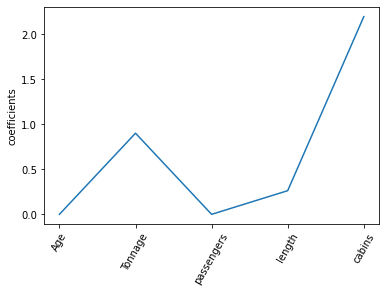

In [13]:
# instantiate the standard scaler
ss =  StandardScaler()

# apply the scaler to the dataset
x_scaled = ss.fit_transform(x)

# split the dataset into training and test sets using the scaled data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state = 42, test_size = 0.4)

# rerun lasso with the tuned hyper parameter
lasso_tunned = Lasso(alpha = 0.1)

# fit the tunned lasso regressor to the dataset
lasso_tunned.fit(x_train, y_train)

# get the lasso coefficients
lasso_coef = lasso_tunned.fit(x_train, y_train).coef_

# predict on the test set
y_pred = lasso_tunned.predict(x_test)

# print the lasso R squared
print('Tunned lasso R squared score is: {}'.format(lasso_tunned.score(x_test, y_test)))

# get the names of our feature variables
names = crew_df.drop('crew', axis = 1).columns

# plot the lasso coefficients
plt.plot(range(len(names)), lasso_coef)

# set the x-axis names
plt.xticks(range(len(names)), names, rotation= 60)

# set the y-axis label
plt.ylabel('coefficients')

# display the plot
plt.show()

Having standardized the features in the dataset, the lasso R squared shows that about 94% percent of variations in  `crew` of ships is determined by the feature variables.

The coefficients plot above shows that the most prominent feature in predicting `crew` size is the number of `cabins` in the ship, followed by the `tonnage` capacity of the ship. The `length` of the ship also contributed but to rather smaller extent, whereas `Age` of the ship and number of `passengers` do not significantly contribute to determining the `crew` size of ships.

### Step 5: Calculate the Pearson correlation coefficient for the training set and testing data sets.

We first convert the numpy arrays to dataframes as follows:

In [14]:
# convert the test_features to dataframe
features_test_df = pd.DataFrame(x_test, columns = ['age', 'tonnage', 'passengers', 'length', 'cabins'])

# convert the test target to series
target_test_df = pd.Series(y_test)

# convert the train_features to dataframe
features_train_df = pd.DataFrame(x_train, columns = ['age', 'tonnage', 'passengers', 'length', 'cabins'])

# convert the train_target to series
target_train_df = pd.Series(y_train)

# concactenate the features and target varibles for the training set
training_set = pd.concat([features_train_df, target_train_df], axis = 1)

# rename the columns of the training set
training_set.rename(columns = {'age': 'Age', 'tonnage': 'Tonnage',
                               'passengers': 'Passengers', 'length': 'Length',
                               'cabins': 'Cabins', 0: 'Crew'}, inplace = True)

# check that we have a well defined training dataset
training_set.head()

,Age,Tonnage,Passengers,Length,Cabins,Crew
0,-0.749501,1.043215,1.190785,0.771549,1.364334,12
1,1.753281,-0.725830,-0.677165,-0.330371,-0.629585,5
2,-0.090874,1.011042,0.775685,0.771549,0.921241,11
3,-1.276402,-1.104984,-1.196040,-1.225331,-1.072678,4
4,1.489831,-1.584000,-1.507365,-2.109104,-1.737318,1


In [15]:
# concactenate the features and target varibles for the test set
test_set = pd.concat([features_test_df, target_test_df], axis = 1)

# rename the columns of the test set
test_set.rename(columns = {'age': 'Age', 'tonnage': 'Tonnage',
                               'passengers': 'Passengers', 'length': 'Length',
                               'cabins': 'Cabins', 0: 'Crew'}, inplace = True)

# check that we have a well defined test dataset
test_set.head()

,Age,Tonnage,Passengers,Length,Cabins,Crew
0,0.304302,-0.034616,-0.054515,0.301695,0.035055,7
1,-0.749501,-0.088508,-0.780940,-0.129005,-0.629585,6
2,-1.539853,4.007253,3.681386,2.063648,4.022893,21
3,1.489831,-1.776662,-1.714915,-2.086730,-1.737318,1
4,4.256063,-1.325859,-1.092265,-1.314827,-1.072678,4


In [16]:
# Plot correlations of the training set
print('CORRELATIONS OF TRAINING SET \n \n', training_set.corr(), '\n \n')

# Plot correlations of the test set
print('CORRELATIONS OF THE TEST SET \n \n', test_set.corr())

CORRELATIONS OF TRAINING SET 
 
                  Age   Tonnage  Passengers    Length    Cabins      Crew
Age         1.000000 -0.557336   -0.442156 -0.464060 -0.447886 -0.470984
Tonnage    -0.557336  1.000000    0.931404  0.938135  0.941668  0.922513
Passengers -0.442156  0.931404    1.000000  0.887612  0.978446  0.910834
Length     -0.464060  0.938135    0.887612  1.000000  0.905097  0.888321
Cabins     -0.447886  0.941668    0.978446  0.905097  1.000000  0.940525
Crew       -0.470984  0.922513    0.910834  0.888321  0.940525  1.000000 
 

CORRELATIONS OF THE TEST SET 
 
                  Age   Tonnage  Passengers    Length    Cabins      Crew
Age         1.000000 -0.660642   -0.595246 -0.612236 -0.579700 -0.610238
Tonnage    -0.660642  1.000000    0.955304  0.903531  0.954530  0.942590
Passengers -0.595246  0.955304    1.000000  0.868122  0.963760  0.933117
Length     -0.612236  0.903531    0.868122  1.000000  0.871499  0.886390
Cabins     -0.579700  0.954530    0.963760  0.871499  

From the above correlations we found the following:

- All the features we extracted for the training set have strong and positive relationships with the `Crew` size, except for `Age` of ships, which has a weak negative relationship with crew size.
- All the features for the test dataset also have very strong positive relationship with the `Crew` size, except for the `Age` of ships, which has a negative relationship with crew size. 

Conclusively, older ships generally tend to have fewer crews members than newer ships.